In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

sns.set_style("darkgrid")

def rm_outliers(df):
    return df[df - df.mean() <= 3*df.std()]

def plot_stuff(f, name):
    data = pd.read_csv(f)
    eg = rm_outliers(data['eg'])
    ch = rm_outliers(data['ch'])
    
    describe = {'eg': eg.describe(), 'ch': ch.describe()}
    print name
    print '---'
    print describe['eg']
    print '---'
    print describe['ch']
    
    sns.distplot(eg, hist=False, kde_kws={'label': 'eg'})
    sns.distplot(ch, hist=False, kde_kws={'label': 'ch'})
    
    lower = min([describe[x]['mean'] - 3*describe[x]['std'] for x in ('eg', 'ch')])
    upper = max([describe[x]['mean'] + 3*describe[x]['std'] for x in ('eg', 'ch')])
    plt.xlabel('nanosegundos')
    plt.xlim(lower, upper)
    
    plt.savefig('imagenes/{}.png'.format(name), format='png', bbox_inches = 'tight', dpi = 200)
    plt.show()

## ATP y NBA distribution

## Comparar a varios tamaños de N:M

## misma C, b cambia

## generador mismo match count??

## Cholesky vs EG
En un sistema con 1000 partidos, el método mas eficaz depende de la cantidad de equipos que juegan.

nba
---
count      975.000000
mean     33112.763077
std       4675.940236
min      11067.000000
25%      32842.000000
50%      33416.000000
75%      33712.500000
max      61489.000000
Name: eg, dtype: float64
---
count      985.000000
mean     35639.183756
std       4318.057312
min      15101.000000
25%      36034.000000
50%      36277.000000
75%      36529.000000
max      62018.000000
Name: ch, dtype: float64


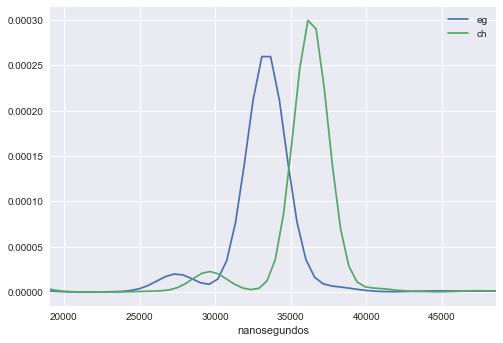

atp
---
count    9.900000e+02
mean     2.090461e+07
std      9.652493e+05
min      1.743751e+07
25%      2.024307e+07
50%      2.089576e+07
75%      2.137203e+07
max      2.670484e+07
Name: eg, dtype: float64
---
count    9.910000e+02
mean     1.327881e+07
std      7.321209e+05
min      1.282508e+07
25%      1.289804e+07
50%      1.296407e+07
75%      1.322334e+07
max      1.629282e+07
Name: ch, dtype: float64


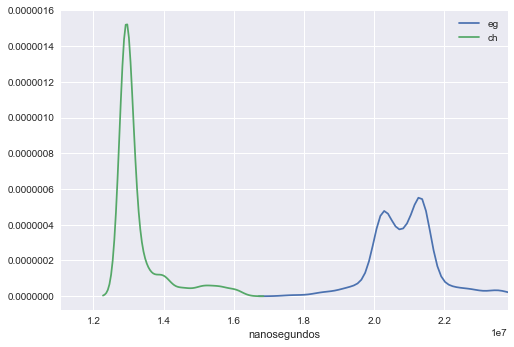

20 equipos
---
count      500.00000
mean     12506.30200
std       4253.79485
min       6216.00000
25%       9568.00000
50%      11593.00000
75%      12083.00000
max      23327.00000
Name: eg, dtype: float64
---
count      493.000000
mean     12693.235294
std       1796.275028
min       7333.000000
25%      10825.000000
50%      13689.000000
75%      14177.000000
max      20184.000000
Name: ch, dtype: float64


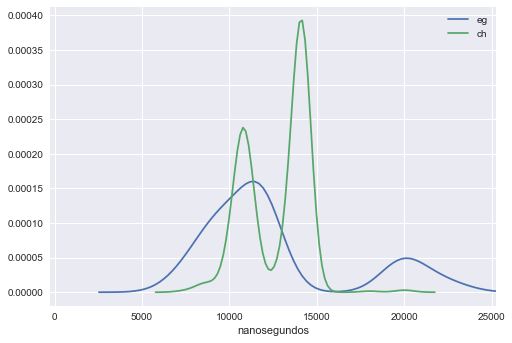

200 equipos
---
count    4.910000e+02
mean     2.559601e+06
std      2.829732e+05
min      2.349591e+06
25%      2.362232e+06
50%      2.428232e+06
75%      2.820599e+06
max      3.606170e+06
Name: eg, dtype: float64
---
count    4.910000e+02
mean     1.229367e+06
std      2.101090e+04
min      1.182827e+06
25%      1.216351e+06
50%      1.227037e+06
75%      1.242506e+06
max      1.336128e+06
Name: ch, dtype: float64


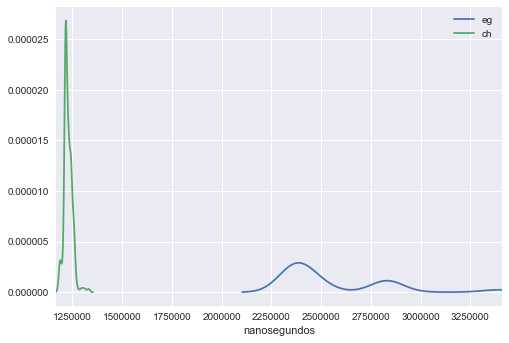

500 equipos
---
count    4.910000e+02
mean     3.565200e+07
std      9.015267e+05
min      3.509357e+07
25%      3.511805e+07
50%      3.519232e+07
75%      3.578108e+07
max      4.060570e+07
Name: eg, dtype: float64
---
count    4.960000e+02
mean     1.884859e+07
std      7.763502e+05
min      1.834945e+07
25%      1.841327e+07
50%      1.848173e+07
75%      1.901608e+07
max      2.481044e+07
Name: ch, dtype: float64


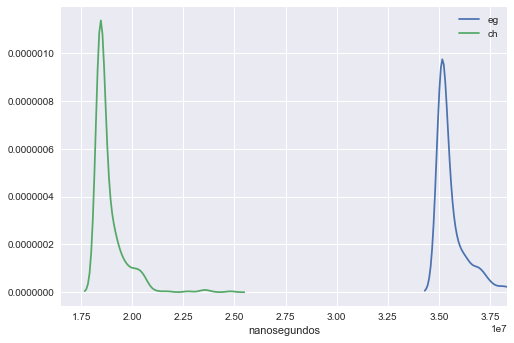

In [5]:
plot_stuff('csv/nba.csv', 'nba')
plot_stuff('csv/atp.csv', 'atp')

plot_stuff('csv/20_1000.csv', '20 equipos')
plot_stuff('csv/200_1000.csv', '200 equipos')
plot_stuff('csv/500_1000.csv', '500 equipos')

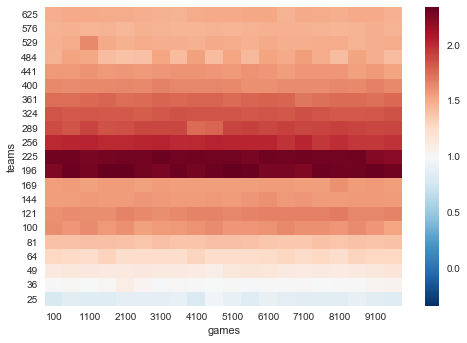

In [11]:
d={'games':[],'teams':[], 'ratio':[]}
for t in range(5,25+1):
    for g in range(100,10000,500):
        data = pd.read_csv('datos/{}_{}.csv'.format(t,g))
        eg = data['eg']
        ch = data['ch']
        d['games'].append(g)
        d['teams'].append(t*t)
        d['ratio'].append(eg.mean()/ch.mean())

df = pd.DataFrame(d)
df = df.pivot('teams', 'games', 'ratio')[::-1]
sns.heatmap(df, center=1, xticklabels=2)
plt.savefig('imagenes/muchos.png', format='png', bbox_inches = 'tight', dpi = 200)
plt.show()

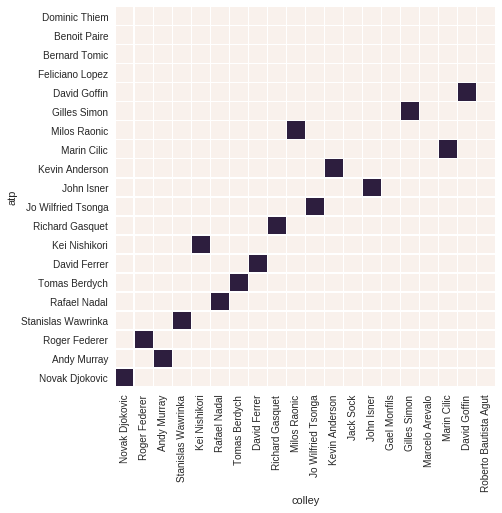

In [47]:
colley = ['Novak Djokovic',
 'Roger Federer',
 'Andy Murray',
 'Stanislas Wawrinka',
 'Kei Nishikori',
 'Rafael Nadal',
 'Tomas Berdych',
 'David Ferrer',
 'Richard Gasquet',
 'Milos Raonic',
 'Jo Wilfried Tsonga',
 'Kevin Anderson',
 'Jack Sock',
 'John Isner',
 'Gael Monfils',
 'Gilles Simon',
 'Marcelo Arevalo',
 'Marin Cilic',
 'David Goffin',
 'Roberto Bautista Agut']
atp = ['Novak Djokovic',
 'Andy Murray',
 'Roger Federer',
 'Stanislas Wawrinka',
 'Rafael Nadal',
 'Tomas Berdych',
 'David Ferrer',
 'Kei Nishikori',
 'Richard Gasquet',
 'Jo Wilfried Tsonga',
 'John Isner',
 'Kevin Anderson',
 'Marin Cilic',
 'Milos Raonic',
 'Gilles Simon',
 'David Goffin',
 'Feliciano Lopez',
 'Bernard Tomic',
 'Benoit Paire',
 'Dominic Thiem']

d = {'atp':[],'colley':[],'x':[]} 

for t1 in atp:
    for t2 in colley:
        d["atp"].append(t1)
        d["colley"].append(t2)
        d["x"].append(1 if t1==t2 else 0)

df = pd.DataFrame(d)
df = df.pivot('atp', 'colley', 'x').reindex_axis(reversed(atp), axis=0).reindex_axis(colley, axis=1)

plt.figure(figsize=(7, 7))
sns.heatmap(df, cbar=False, linewidths=0.5, square=True)
plt.savefig('imagenes/ranking.png', format='png', bbox_inches = 'tight', dpi = 200)

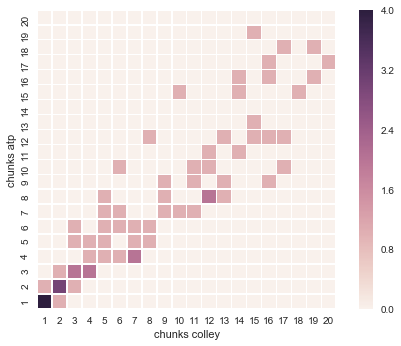

In [13]:
atp = ["Novak Djokovic","Andy Murray","Roger Federer","Stan Wawrinka","Rafael Nadal","Tomas Berdych","David Ferrer","Kei Nishikori","Richard Gasquet","Jo-Wilfried Tsonga","John Isner","Kevin Anderson","Marin Cilic","Milos Raonic","Gilles Simon","David Goffin","Feliciano Lopez","Bernard Tomic","Benoit Paire","Dominic Thiem","Fabio Fognini","Viktor Troicki","Ivo Karlovic","Gael Monfils","Roberto Bautista Agut","Jack Sock","Guillermo Garcia-Lopez","Grigor Dimitrov","Andreas Seppi","Nick Kyrgios","Jeremy Chardy","Steve Johnson","Joao Sousa","Philipp Kohlschreiber","Leonardo Mayer","Alexandr Dolgopolov","Thomaz Bellucci","Gilles Muller","Vasek Pospisil","Pablo Cuevas","Jiri Vesely","Tommy Robredo","Martin Klizan","Borna Coric","Aljaz Bedene","Marcos Baghdatis","Adrian Mannarino","Donald Young","Fernando Verdasco","Teymuraz Gabashvili","Hyeon Chung","Federico Delbonis","Juan Monaco","Albert Ramos-Vinolas","Lukas Rosol","Victor Estrella Burgos","Jerzy Janowicz","Simone Bolelli","Sam Querrey","Sam Groth","Denis Istomin","Sergiy Stakhovsky","Andreas Haider-Maurer","Pablo Andujar","Mikhail Kukushkin","Robin Haase","Pablo Carreno Busta","Paolo Lorenzi","Denis Kudla","Santiago Giraldo","Nicolas Mahut","Inigo Cervantes","Nicolas Almagro","Guido Pella","Daniel Munoz de la Nava","Dusan Lajovic","Yen-Hsun Lu","Lucas Pouille","Andrey Kuznetsov","Thanasi Kokkinakis","Ernests Gulbis","Damir Dzumhur","Alexander Zverev","Marcel Granollers","Ricardas Berankis","Steve Darcis","Ivan Dodig","Diego Schwartzman","Rajeev Ram","Marco Cecchinato","Evgeny Donskoy","John Millman","Yuki Bhambri","Illya Marchenko","Paul-Henri Mathieu","Taro Daniel","Benjamin Becker","Daniel Gimeno-Traver","Thiemo de Bakker","Dudi Sela"]
colley = ["Novak Djokovic","Roger Federer","Andy Murray","Stan Wawrinka","Kei Nishikori","Rafael Nadal","Tomas Berdych","David Ferrer","Richard Gasquet","Milos Raonic","Jo-Wilfried Tsonga","Kevin Anderson","Jack Sock","John Isner","Gael Monfils","Gilles Simon","Marcelo Arevalo","Marin Cilic","David Goffin","Roberto Bautista Agut","Grigor Dimitrov","Benoit Paire","Philipp Kohlschreiber","Gilles Muller","Ivo Karlovic","Nick Kyrgios","Mohammad Ghareeb","Marcos Baghdatis","Bernard Tomic","Steve Johnson","Chieh Fu Wang","Dominic Thiem","Feliciano Lopez","Andreas Seppi","Fabio Fognini","Guillermo Garcia-Lopez","Viktor Troicki","Aisam Ul Haq Qureshi","Pierre Hugues Herbert","Simone Bolelli","Jeremy Chardy","Vasek Pospisil","Marton Fucsovics","Gonzalo Lama","Borna Coric","Joao Sousa","Christian Garin","Inigo Cervantes","Egor Gerasimov","Juan Carlos Saez","Daniel Brands","Jan Mertl","Leonardo Mayer","Tommy Robredo","Fernando Verdasco","Donald Young","Alexandr Dolgopolov","Pablo Cuevas","Juan Monaco","Dimitar Kuzmanov","Mischa Zverev","Martin Klizan","Thomaz Bellucci","Christian Garay","Jerzy Janowicz","Martins Podzus","Hyeon Chung","Lucas Pouille","Nicolas Almagro","Marsel Ilhan","Denis Istomin","Oliver Marach","Mirza Basic","Evgeny Donskoy","Sam Querrey","Matteo Donati","Victor Estrella Burgos","Yen-Hsun Lu","Aljaz Bedene","Damir Dzumhur","Aqeel Khan","Adrian Mannarino","Sam Groth","Hans Podlipnik Castillo","Steve Darcis","Nicolas Mahut","Daniel Garza","Christopher Rungkat","Henri Laaksonen","Darian King","Rajeev Ram","Alex Diaz","Andrey Kuznetsov","Benjamin Lock","Gianni Mina","Alexander Zverev","Tihomir Grozdanov","Mauricio Echazu","Joao Domingues","Francis Casey Alcantara"]

def simil(l1,l2): return sum(map(lambda x: x in l2, l1))
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
d = {'chunks atp':[],'chunks colley':[],'x':[]} 
for t1, g1 in enumerate(chunks(atp, 5)):
    for t2, g2 in enumerate(chunks(colley, 5)):
        d["chunks atp"].append(t1+1)
        d["chunks colley"].append(t2+1)
        d["x"].append(simil(g1,g2))

df = pd.DataFrame(d)
df = df.pivot('chunks atp', 'chunks colley', 'x').reindex_axis(reversed(range(1,21)), axis=0)

#plt.figure(figsize=(7, 7))
sns.heatmap(df, cbar=True, linewidths=0.5, square=True)
plt.savefig('imagenes/ranking_distance.png', format='png', bbox_inches = 'tight', dpi = 200)

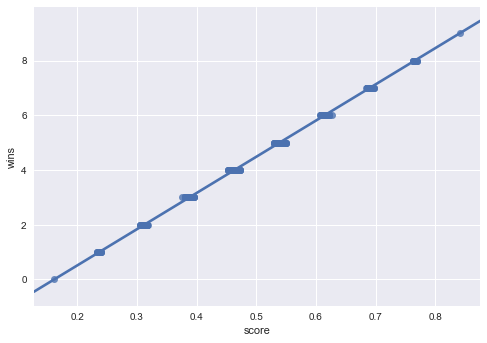

In [3]:
df = pd.read_csv('tests/force.final')
g = sns.regplot(x="score", y="wins", data=df)
plt.savefig('imagenes/wins_score-regplot.png', format='png', bbox_inches = 'tight', dpi = 200)